In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
citi = pd.read_csv('S:\\CITI Bike DATA\\202001-citibike-tripdata.csv\\202001-citibike-tripdata.csv')

In [4]:
from math import radians, sin, cos, acos
l1 = []
for i in range(len(citi)):
    slat = radians(citi['start station latitude'][i])
    slon = radians(citi['start station longitude'][i])
    elat = radians(citi['end station latitude'][i])
    elon = radians(citi['end station longitude'][i])
    dist = 6371.01 * acos((sin(slat)*sin(elat)) + cos(slat)*cos(elat)*cos(slon - elon))
    print(dist)
    l1.append(dist)

2.1127576916248705
0.5229788787396061
5.655770607176279
1.9633043976660516
1.4261280418006501
4.289375694615972
1.0278884052566828
4.897410850520754
0.3466335245216537
1.2094576701353976
1.0358995447358432
1.225380919332917
2.4383667874450126
0.401407491267275
1.344493278591136
2.2979101081578888
2.4383667874450126
2.560544561246943
1.857647307590811
0.7312857210907323
1.029432790733949
4.127713641459974
0.479911708687999
2.3707842825468672
1.5140411912689584
0.48015458523465687
1.8719335488697326
1.705613577160954
0.43157397339015346
0.4448940031052008
0.3466335245216537
2.6218582524783627
1.9308740929099084
3.8667433586445887
0.7918504004908209
1.8269765129578706
3.7807410776032024
1.644056642713822
1.70452955400386
2.916119639295725
0.7191742413208957
2.916119639295725
0.7359358746581479
0.6897870625539989
9.493544697761536e-05
2.740070023887807
0.3799222648322789
1.7846919053446824
0.5524690992457268
2.220582246041952
1.6335303920995052
3.1348964871868894
1.347510847511031
0.0
1.75

ValueError: math domain error

In [5]:
citi['Station_travel'] = citi['start station name'] +" --- "+ citi['end station name'] 
df = pd.DataFrame(l1)
citi['Distance'] = df

In [6]:
citi = citi[(citi['tripduration'] <5000)]

In [7]:
citi = citi.dropna()

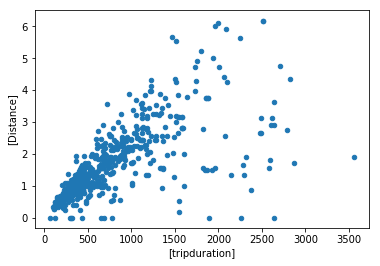

In [8]:
citi.plot(kind='scatter',y=['Distance'],x=['tripduration'])
plt.show()

In [9]:
X = pd.DataFrame(citi['tripduration'])
y = pd.DataFrame(citi['Distance'])
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

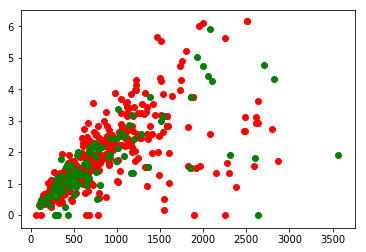

In [10]:
plt.scatter(X_train,y_train,color='r')
plt.scatter(X_test,y_test,color='g')

In [11]:
LR = LinearRegression()
LR.fit(X_train.values.reshape(-1,1),y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [12]:
prediction = LR.predict(X_test.values.reshape(-1,1))

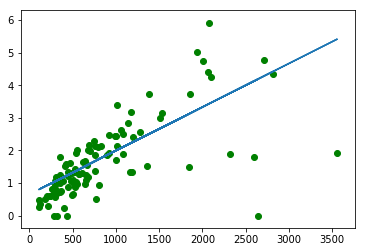

In [13]:
plt.plot(X_test,prediction)
plt.scatter(X_test,y_test,color='g')

In [14]:
LR.score(X_test.values.reshape(-1,1),y_test.values)

0.4432843698135176

In [33]:
LR.predict([[3500]])

array([[5.33510726]])

In [16]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
mse = mean_squared_error(y_test, prediction)
mae = mean_absolute_error(y_test, prediction)
print(np.sqrt(mse))
print(mae)

0.8703233688916945
0.5794087337870981


In [25]:
from sklearn.preprocessing import PolynomialFeatures 
  
poly = PolynomialFeatures(degree = 1)
X_poly = poly.fit_transform(X) 
  
poly.fit(X_poly, y)
lin2 = LinearRegression() 
lin2.fit(X_poly, y)
new_prediction = lin2.predict(poly.fit_transform(X))

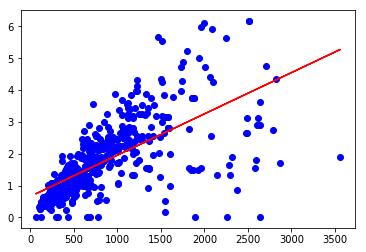

In [26]:
plt.scatter(X,y,color = 'blue')
plt.plot(X,new_prediction, color = 'red')